<a href="https://colab.research.google.com/github/harshikabisht/stylegan2-ada/blob/main/Harshika_CycleGAN_procedural_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 676 kB 17.0 MB/s 
     |████████████████████████████████| 1.7 MB 51.6 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 181 kB 71.9 MB/s 
     |████████████████████████████████| 144 kB 69.5 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-py3-none-any.whl size=655250 sha256=a02e21dacc69dd40d15e9d8deed30d99ef2e8e057ab13dff6952cd6333263961
  Stored in directory: /root/.cache/pip/wheels/2d/d1/9b/cde923274eac9cbb6ff0d8c7c72fe30a3da9095a38fd50bbf1
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=7c58b9b20ac26496b31953b9a342cca8b83efc03c7eee000272df3d89a666f35
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=25537dacbeef7a8e5df810b0f3e01f25e341d652e4bb

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [5]:
#!bash ./datasets/download_cyclegan_dataset.sh horse2zebra
!bash ./datasets/dataset00

./datasets/dataset00: ./datasets/dataset00: Is a directory


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh horse2zebra

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [16]:
#!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --use_wandb
!python train.py --dataroot ./datasets/dataset00 --name dataset00 --model cycle_gan --use_wandb --batch_size 4 --num_epoch=25
#trainer.trainEpochs( 25 )

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/dataset00          	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

NameError: ignored

In [25]:
cp ./checkpoints/dataset00/latest_net_G_A.pth ./checkpoints/dataset00/web/latest_net_G.pth

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [33]:
#!python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout --use_wandb --results_dir {/content/drive/MyDrive}
!python test.py --dataroot datasets/dataset00/testA --name dataset00/web --model test --no_dropout --use_wandb --results_dir {/content/drive/MyDrive}

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/dataset00/testA      	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

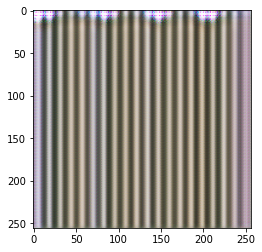

In [39]:
import matplotlib.pyplot as plt

#img = plt.imread('./results/dataset00_pretrained/test_latest/images/n02381460_1010_fake.png')
#img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/dataset00/web/test_latest/images/download (1)_fake.png')
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/dataset00/web/test_latest/images/download (10)_fake.png')
plt.imshow(img)

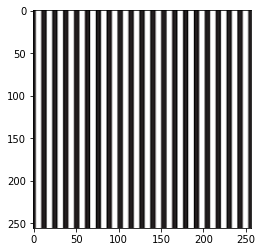

In [40]:
import matplotlib.pyplot as plt

#img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/dataset00/web/test_latest/images/download (1)_real.png')
img = plt.imread('/content/pytorch-CycleGAN-and-pix2pix/results/dataset00/web/test_latest/images/download (10)_real.png')
plt.imshow(img)